In [1]:
# import all the necessary modules
import os
import rasterio
import numpy as np
%matplotlib inline
import xarray as xr
import rioxarray as rxr
from glob import glob
import geopandas as gpd
from rasterio.plot import show
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [11]:
# define input path
data_path = "harvey"
pattern = "*B[5-6]*.TIF"
shp_path = r"harvey/Texas.shp"
path = os.path.join(data_path, pattern)
band_path = glob(path)
band_path

['harvey\\LC08_L2SP_025040_20170929_20200903_02_T1_SR_B5.TIF',
 'harvey\\LC08_L2SP_025040_20170929_20200903_02_T1_SR_B6.TIF']

(-107.28714087607067, -92.83282935257536, 25.30681607716446, 37.03229933323348)

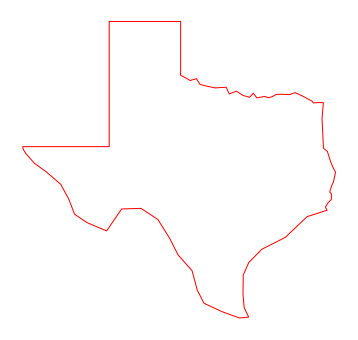

In [12]:
aoi = gpd.read_file(shp_path)
aoi
fig, ax = plt.subplots(1, figsize=(10,6))
aoi.plot(facecolor = 'None', edgecolor = 'Red', ax=ax)
ax.axis('off')

In [16]:
#def open_clean_band(path):
#    return rxr.open_rasterio(band_path, masked=True).squeeze()
#data = open_clean_band(band_path[0])


band_1 = rxr.open_rasterio(band_path, masked=True).squeeze()


TypeError: invalid path or file: ['harvey\\LC08_L2SP_025040_20170929_20200903_02_T1_SR_B5.TIF', 'harvey\\LC08_L2SP_025040_20170929_20200903_02_T1_SR_B6.TIF']

In [15]:

band_5 = es.crs_check(band_1[0])

print("Landsat crs is:", band_1)
print("aoi crs", aoi.crs)


TypeError: invalid path or file: <xarray.DataArray (y: 7881, x: 7741)>
[61006821 values with dtype=float32]
Coordinates:
    band         int32 1
  * x            (x) float64 1.755e+05 1.755e+05 ... 4.077e+05 4.077e+05
  * y            (y) float64 3.313e+06 3.313e+06 ... 3.077e+06 3.077e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

C:\Users\Gokul G\AppData\Local\Temp\ipykernel_7180\1908047332.py:3: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  raster = rxr.open_rasterio(path)


RasterioIOError: 'harvey\*B5*.TIF' does not exist in the file system, and is not recognized as a supported dataset name.

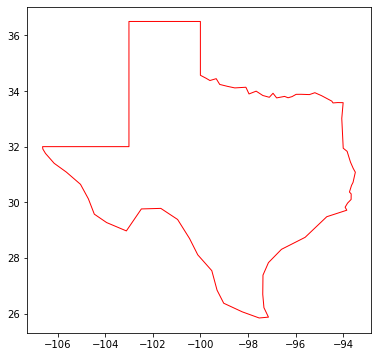

In [17]:
# clip the satellite image to the box

clp_path = os.path.join(clp_dir, clp_file)


NameError: name 'clp_dir' is not defined

In [11]:
#data = rxr.open_rasterio(band_path, masked=True)

def combine_tifs(tif_list):
    out_xr = []
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"] = i+1

    return rxr.concat(out_xr, dim="band")